In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def readData(fname='ZipDigits.train'):
    '''
     Input:
     fname: name of file containing N examples, each 
    with d attributes
     Output:
     X: N x d+1 numpy array
     y: N x 1 numpy array
    '''
    with open(fname) as f:
        X = []
        y = []
        rlines = f.readlines()
        for line in rlines:
            row = line.rstrip().split(' ')
            yval = int(float(row[0].replace(',','')))
            y.append(yval)
            xvals = [float(pixel.replace(',','')) for pixel in row[1:]]
            X.append(xvals)
        X = np.array(X)
        y = np.array(y)
        y = y.reshape((y.shape[0], 1))
    print(f'X shape: {X.shape}')
    print(f'y shape: {y.shape}')
    return X, y

In [3]:
Xdigitstrain, ydigitstrain = readData('ZipDigits.train.csv')
Ndigitstrain, pixels = Xdigitstrain.shape
assert(Ndigitstrain == ydigitstrain.shape[0])
Xdigitstest, ydigitstest = readData('ZipDigits.test.csv')
Ndigitstest, pixels = Xdigitstest.shape
assert(Ndigitstest == ydigitstest.shape[0])

X shape: (7291, 256)
y shape: (7291, 1)
X shape: (2007, 256)
y shape: (2007, 1)


In [4]:
def showKthImage(X, y, k):
    image = X[k, :].reshape((16, 16))
    plt.imshow(image, cmap='gray', vmin=-1, vmax=1)
    plt.title(f'First digit is a {y[k, 0]}')
    plt.xlim(0, 15)
    plt.ylim(15, 0)
    plt.xticks(range(16))
    plt.yticks(range(16))
    plt.tight_layout()
    plt.show()

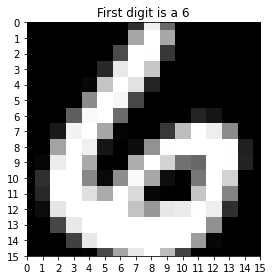

In [5]:
showKthImage(Xdigitstrain, ydigitstrain, 0)

In [6]:
def computeIntensity(X):

    '''

    Input:

        X: a 2 dimensional N x 256 numpy array

           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit

           each pixel has an intensity value between -1 and 1

    Output:

        intensities: a 2 dimensional N x 1 numpy array

                     each row consists of a single value representing the 

                     average pixel intesity of the corresponding image

                     See LFD Example 3.1

    '''

    print('computing intensity feature')

    N, d = X.shape

    print(f'Input shape {N}, {d}')

    '''

    TODO: Compute the intensity feature for N data points

    '''
    intensities = np.mean(X,axis=1).reshape(-1,1)

    print(f'Output shape {intensities.shape}')

    return intensities





def computeSymmetry(X):

    '''

    Input:

        X: a 2 dimensional N x 256 numpy array

           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit

           each pixel has an intensity value between -1 and 1

    Output:

        symmetries: a 2 dimensional N x 1 numpy array

                     each row consists of a single value representing the 

                     "horizontal" symmetry of the 16 x 16 image about the vertical axis

                     See LFD Example 3.1

    '''

    print('computing symmetry feature')

    N, d = X.shape

    print(f'Input shape {N}, {d}')

    Ximgs = [X[n, :].reshape((16, 16)) for n in range(N)]

    Ximgs_flipped = [np.flip(Ximgs[n], axis=1) for n in range(N)]

    '''

    TODO: Compute the symmetry feature for N data points

    '''
    symmetries = np.array([-np.mean(abs(Ximgs[n] - Ximgs_flipped[n])) for n in range(N)])
    print('-->',symmetries.shape)
    symmetries = symmetries.reshape(N, 1)

    print(f'Output shape {symmetries.shape}')

    return symmetries





def computeAugmentedXWithFeatures(X):

    '''

    Input:

        X: a 2 dimensional N x 256 numpy array

           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit

           each pixel has an intensity value between -1 and 1

    Output:

        Xaug: a 2 dimensional N x 3 numpy array

              the augmented feature matrix

              the i-th row corresponds to the i-th row of X (and image represented by it)

              the 0-th column is the column of 1s

              the 1-st column is the column of average intensities

              the 2-nd column is the column of horizontal symmetries

    '''

    N, d = X.shape

    intensity = computeIntensity(X)

    symmetry = computeSymmetry(X)

    dummy = np.ones((N, 1))

    Xaug = np.concatenate((dummy, intensity, symmetry), axis=1)

    # print(Xaug)

    print (f'Shape of augmented feature matrix: {Xaug.shape}')

    return Xaug

In [7]:
'''

Compute the augmented matrix with features

'''



print('Computing augmented training feature matrix')



Xaugtrain = computeAugmentedXWithFeatures(Xdigitstrain)



Naugtrain, d = Xaugtrain.shape



print('Computing augmented test feature matrix')



Xaugtest = computeAugmentedXWithFeatures(Xdigitstest)



Naugtest, d = Xaugtest.shape

Computing augmented training feature matrix
computing intensity feature
Input shape 7291, 256
Output shape (7291, 1)
computing symmetry feature
Input shape 7291, 256
--> (7291,)
Output shape (7291, 1)
Shape of augmented feature matrix: (7291, 3)
Computing augmented test feature matrix
computing intensity feature
Input shape 2007, 256
Output shape (2007, 1)
computing symmetry feature
Input shape 2007, 256
--> (2007,)
Output shape (2007, 1)
Shape of augmented feature matrix: (2007, 3)


In [8]:
'''

Create the dataset wih digits 1 and 5

'''



def indexDigits(y):

    '''

    Input:

        y: N x 1 2 dimensional numpy array; labels for handwritten digits

    Output:

        digit_idxs: a dictionary; the keys are digits 0 -- 9

                    for a digit k, digit_idxs[k] is a list identifying the rows labeled with digit k

    '''

    N = y.shape[0]

    digit_idxs = {}

    for n in range(N):

        digit = ydigitstrain[n, 0]

        if not digit in digit_idxs:

            digit_idxs[digit] = []

        digit_idxs[digit].append(n)

    return digit_idxs

In [9]:
'''

Construct the training and test sets for the rest of the exercises on classifying 1s vs 5s

'''

digit_idxs_train = indexDigits(Xaugtrain)

X1train = Xaugtrain[digit_idxs_train[1], :]

N1train = X1train.shape[0]

print(f'number of 1s: {N1train}')

X5train = Xaugtrain[digit_idxs_train[5], :]

N5train = X5train.shape[0]

print(f'number of 5s: {N5train}')

Xtrain = Xaugtrain[digit_idxs_train[1]+digit_idxs_train[5], :]

ytrain = np.concatenate((np.ones((N1train, 1)), -1*np.ones((N5train, 1))), axis=0)

Ntrain, d = Xtrain.shape

print(f'number of 1s and 5s: {Ntrain}')

print(f'Xtrain shape: {Xtrain.shape}, ytrain shape: {ytrain.shape}')





digit_idxs_test = indexDigits(Xaugtest)

Xtest = Xaugtest[digit_idxs_test[1]+digit_idxs_test[5], :]

ytest = np.concatenate((np.ones((len(digit_idxs_test[1]), 1)), -1*np.ones((len(digit_idxs_test[5]), 1))), axis=0)

Ntest, d = Xtest.shape

print(f'number of 1s and 5s: {Ntest}')

print(f'Xtest shape: {Xtest.shape}, ytest shape: {ytest.shape}')

number of 1s: 1005
number of 5s: 556
number of 1s and 5s: 1561
Xtrain shape: (1561, 3), ytrain shape: (1561, 1)
number of 1s and 5s: 428
Xtest shape: (428, 3), ytest shape: (428, 1)


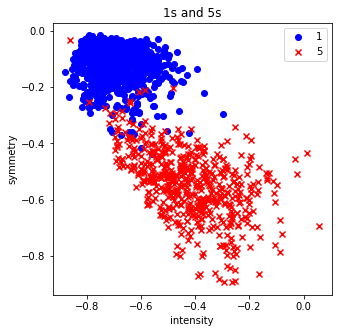

In [10]:
'''

Plot the training data

'''

fig, axs = plt.subplots(figsize=(5,5))

axs.scatter(X1train[:, 1], X1train[:, 2], marker='o', color='blue', label='1')

axs.scatter(X5train[:, 1], X5train[:, 2], marker='x', color='red', label = '5')

axs.set_xlabel('intensity')

axs.set_ylabel('symmetry')

# axs.set_xlim(-1, 0.2)

# axs.set_ylim(1, 2)

axs.set_title('1s and 5s')

axs.legend()